## 分析微信好友

本文将使用 itchat 库对自己的微信好友做个简单的分析

### 安装

```sh
pip install itchat
```

### 登录

通过扫描二维码登录自己的微信, 获取好友信息

In [1]:
# 导入 itchat
import itchat

itchat.auto_login(enableCmdQR=-2, hotReload=True)

friends = itchat.get_friends(update=True)

### 男女比例

In [2]:
# 初始化计数器
male, female, other = (0, 0, 0)
# friends[0] 是自己, 所以从 1 开始遍历
friends = friends[1:]
for f in friends:
    sex = f["Sex"]
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1

num_of_friends = len(friends)
# 打印好友的性别比例
print("男性好友: %.2f%%" % (male/num_of_friends*100) + "\n" 
      + "女性好友: %.2f%%" % (female/num_of_friends*100) + "\n"
      + "不明性别: %.2f%%" % (other/num_of_friends*100))

男性好友: 70.67%
女性好友: 25.96%
不明性别: 3.37%


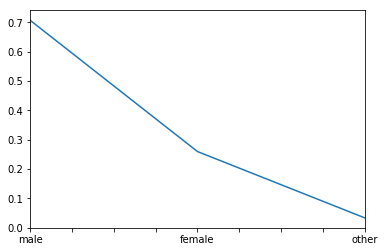

In [3]:
# 画图
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

index = ["male", "female", "other"]
value = [male/num_of_friends, female/num_of_friends, other/num_of_friends]
data = pd.Series(value, index)
data.plot()


### 整理数据

In [4]:
# 取各个不同的字段, 存成一个列表
def get_data(var):
    data = []
    for f in friends:
        data.append(f[var])
    return data

nick_name = get_data("NickName")
remark_name = get_data("RemarkName")
sex = get_data("Sex")
province = get_data("Province")
city = get_data("City")
signature = get_data("Signature")
data = {
    "NickName": nick_name,
    "RemarkName": remark_name,
    "Sex": sex,
    "Province": province,
    "City": city,
    "Signature": signature
}
dframe = pd.DataFrame(data)
dframe.to_csv("wechat_friends.csv", index=True)